# Table of Contents
Business Background

Problem Definition

Data Dictionary

Data Processing

Data Cleaning
1. Missing values
2. Duplicate values
3. Zero values
4. Outliers

Data Analysis

Recommendation


# Business Background

Airbnb operates as a multi-sided platform that facilitates short-term rentals by connecting hosts with travelers.  Here's a breakdown of their business model:

- Value proposition:
<br> Hosts: Earn rental income on underutilized spaces and tap into a global audience of travelers seeking unique accommodations. Hosts can list their own space for rent and earn some extra income. Airbnb takes care of the booking process and secure payment.
<br> Travelers: Access a wider variety of lodging options beyond traditional hotels, often at more affordable prices, and potentially experience a more local feel during their stay. 
- Key partners: The core partners are the hosts who list their properties and the travelers who book them.
- Revenue model: Airbnb charges commission fees on each booking, typically ranging from 3% to 14.2% for hosts and 0% to 20% for guests (depending on factors like location and booking price). They may also offer optional add-on services such as guest screening or professional photography for listings, generating additional revenue.
- Key resources: The core resource is the online platform itself, which efficiently matches supply (rental properties) with demand (travelers seeking accommodations). They also invest in building trust through a review system and fostering a sense of community among users.
In essence, Airbnb acts as an intermediary, earning commissions by connecting these two distinct customer segments. This light-asset model allows them to scale rapidly without the burden of owning or managing properties themselves.

# Problem Definition

Tomorrowland is an annual large-scale Electronic Dance Music Festival that held in Antwerp Belgium, since 2005. Tomorrowland's success has led to the creation of spin-off festivals. From 2013 to 2015, the concept was briefly exported to the United States, near Atlanta, under the name TomorrowWorld. In 2015, a festival known as Tomorrowland Brasil was started in a third country, Brazil. Since 2019, the festival has set up a winter edition, Tomorrowland Winter, in the heart of the Olympic resort of Alpe d'Huez, France.

Recently, Tomorrowland is reportedly set to host its debut festival in Bangkok, Thailand in 2026, even though the spesific location is not confirmed yet. The first ASEAN country to host the biggest EDM festival in the world. Naturally, this would boost Thai economy through tourism and entertainment. Its also comes with challenges to AirBnB:

1. It is possible that foreigners from across the world will came to Thailand just to experience the festival.
2. It is possible to compete with local hotel.

Adopting the How Might We (HMW) method, we will breakdown these challenges into problem statement:

1. How Might We make AirBnB in Bangkok the top-of-mind within the foreigners that came to see the festival.
<br>- Is our listings total reviews positive?
<br>- Is our listings name affecting popularity?
2. How Might We increase the foreigners tendencies to book an AirBnB, instead of hotel.
<br>- Is our listings location near the possible festival location?
<br>- Is the listings near the festival have more affordable price than the every neighborhood surrounding?

# Data Dictionary

| No. | Feature | Description |
| :- | :- | :- |
| 1. | id | Airbnb's unique identifier for the listing. |
| 2. | name | Name of the listing. |
| 3. | host_id | Airbnb's unique identifier for the host/user. |
| 4. | host_name | Name of the host. Usually, just the first name(s). |
| 5. | neighborhood | The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| 6. | latitude | Uses the World Geodetic System (WGS84) projection for latitude and longitude. |
| 7. | longitude | Uses the World Geodetic System (WGS84) projection for latitude and longitude. |
| 8. | room_type | All listings are grouped into the following four room types: <br><br>Entire place <br>Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies the first floor of the home") and provide further details on the listing. <br><br>Hotel rooms <br>Similar to Private room but in a hotel.<br><br>Private rooms <br>Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room. <br><br>Shared rooms <br>Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays. |
| 9. | price | Daily price in local currency. |
| 10. | minimum_nights | The minimum number of night stays for the listing (calendar rules may differ). |
| 11. | number_of_reviews | The number of reviews the listing has. |
| 12. | last_review | The date of the last/newest review. |
| 13. | reviews_per_month | The number of reviews per month. |
| 14. | calculated_host_listings_count | The number of listings the host has in the current scrape in the city/region geography. |
| 15. | availability_365 | avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host. |
| 16. | number_of_reviews_ltm | The number of reviews the listing has (in the last 12 months). |

# Data Processing

In [1]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd

In [2]:
# Import dataset

df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

In [3]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

The dataset have <b>15854</b> rows and <b>17</b> columns. 
<br><br>If we see from the df.info above there is a column 'Unnamed: 0' and it's the same as index, so we will drop that spesific column.

In [4]:
# Remove column Unnamed:0.

df.drop('Unnamed: 0', axis=1, inplace=True)

The dataset's data type consist of: <b>float</b>, <b>integer</b>, and <b>object</b>.
<br><br>If we see from the values on dataset above, we see that column 'last_review' has a date time value, so we will change the format to datetime

In [5]:
# Change 'last_review' column type to datetime

df['last_review'] = pd.to_datetime(df['last_review'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

# Data Cleaning

### 1. Missing values

In [7]:
# Check null values

df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

As we can see from the information, there is null values in name, host name, last review, and review per month

The column 'name' and 'host_name' contains null values. We will be deleting all nameless listings, because:
- The number of listings with no listing name is very insignificant. Is just only 0.05% of the dataset
- The data analysis section may need analysis based on the listing name and host_name. Null values in the dataset may impact the insights obtained from the analysis.
- An AirBnB listing requires a listing name and a host name (Source: AirBnB Listing Page). Therefore any listing that do not contain these information are likely to be errors in the program, or false information. We will need to remove these to ensure the data we work with are reliable and valid.

In [8]:
df[df['name'].isna()] # Index null column 'name' 

id name   host_id        host_name neighbourhood  latitude  \
439    4549768  NaN  18852579          Titawan  Phra Khanong  13.69406   
544    4720818  NaN  24386225           Cherry     Din Daeng  13.77562   
572    4245018  NaN  22030043        Parichart    Bang Phlat  13.78376   
669    6148415  NaN  31895202            Chira       Bang Na  13.68276   
1030   8055144  NaN  42521288          Nantida       Vadhana  13.74126   
1282  10000742  NaN  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594  10710165  NaN  55347997      Khaneungnit       Vadhana  13.71757   
2075  13142743  NaN  73275200         Pakaphol   Khlong Toei  13.72566   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
439   100.59619     Private room   1080               5                  0   
544   100.57346     Private room   1200               1                  0   
572   100.49821     Private room   1200               1                  0   
669   100.60894  Entire home/apt   2424               2                  0   
1030  100.55761     Private room   5000               3                  0   
1282  100.52928     Private room    930               1                  6   
1594  100.60464     Private room   1000               1                  0   
2075  100.56416     Private room    850               1                  2   

     last_review  reviews_per_month  calculated_host_listings_count  \
439          NaT                NaN                               1   
544          NaT                NaN                               1   
572          NaT                NaN                               1   
669          NaT                NaN                               1   
1030         NaT                NaN                               1   
1282  2017-05-13               0.07                               1   
1594         NaT                NaN                               1   
2075  2017-12-11               0.03                               3   

      availability_365  number_of_reviews_ltm  
439                365                      0  
544                365                      0  
572                365                      0  
669                365                      0  
1030               365                      0  
1282               365                      0  
1594               365                      0  
2075               220                      0

In [9]:
df[df['host_name'].isna()] # Index null column 'host_name' 

id           name    host_id host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  number_of_reviews  \
3571  100.63769  Private room   1399               3                  1   

     last_review  reviews_per_month  calculated_host_listings_count  \
3571  2017-07-29               0.02                               1   

      availability_365  number_of_reviews_ltm  
3571               365                      0

In [10]:
# Delete rows where 'name' and or 'host_name' are null

df.dropna(subset=['name','host_name'], inplace=True)

In the other hand, 'last_review' and 'reviews_per_month' is NaN because the 'number_of_reviews' is 0,
- 'last_review': We will ignored the null in this column, because the value is date & time. Any filling to this data type would be irrelevant to the dataset
- 'reviews_per_month': This metric is calculated based on existing reviews. If there are no reviews, this value would be null or zero. Thus, for this spesfic column we will fill the null with zero.

In [11]:
df[df['last_review'].isna()] # Index null column 'last_review' 

id                                               name  \
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
4                  941865                         Suite Room 3 at MetroPoint   
7                 1738669                    1 chic bedroom apartment in BKK   
14                 959254                 Deluxe Condo, Nana, Pool/GYM/Sauna   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
7        7045870    Jiraporn    Chatu Chak  13.829250  100.567370   
14       5153476      Natcha   Khlong Toei  13.715160  100.568060   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
4         Private room   1905               1                  0         NaT   
7      Entire home/apt   1461               1                  0         NaT   
14     Entire home/apt   1400              30                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                    NaN                               2               358   
2                    NaN                               1               365   
4                    NaN                               3               365   
7                    NaN                               1               365   
14                   NaN                               1               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
1                          0  
2                          0  
4                          0  
7                          0  
14                         0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                    

In [12]:
# Validate that 'last_review' is null because 'number_of_reviews' is 0

df[(df['number_of_reviews'] == 0) & (df['last_review'].notna())]


Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

In [13]:
df[df['reviews_per_month'].isna()] # Index null column 'reviews_per_month' 

id                                               name  \
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
4                  941865                         Suite Room 3 at MetroPoint   
7                 1738669                    1 chic bedroom apartment in BKK   
14                 959254                 Deluxe Condo, Nana, Pool/GYM/Sauna   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
7        7045870    Jiraporn    Chatu Chak  13.829250  100.567370   
14       5153476      Natcha   Khlong Toei  13.715160  100.568060   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
4         Private room   1905               1                  0         NaT   
7      Entire home/apt   1461               1                  0         NaT   
14     Entire home/apt   1400              30                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                    NaN                               2               358   
2                    NaN                               1               365   
4                    NaN                               3               365   
7                    NaN                               1               365   
14                   NaN                               1               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
1                          0  
2                          0  
4                          0  
7                          0  
14                         0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                    

In [14]:
# Validate that 'reviews_per_month' is null because 'number_of_reviews' is 0

df[(df['number_of_reviews'] == 0) & (df['reviews_per_month'].notna())]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

In [15]:
# Fill null values in reviews_per_month with zero

df['reviews_per_month'].fillna(0, inplace=True)

In [16]:
# Re-check null values

df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### 2. Duplicate rows

In [17]:
df.duplicated().sum() # Check for duplicated rows

0

There is no duplicated rows. But we have to check if there is a duplicated values on a certain columns.

In [18]:
# Check a duplication of a listings with same values on columns:
# 'name', 'host_name', 'price', 'longitude', 'latitude',  'room_type', 'last_review'

df_duplicate = df[df.duplicated(subset=['name', 'host_name', 'price', 'longitude', 'latitude',  'room_type', 'last_review'])]
display(df_duplicate)
print(f'Total of duplicate listings is {len(df_duplicate)} listings')

id                                             name  \
5976             28907857                        NA BANGLAMPOO GUEST HOUSE   
8790             37954129                                           small1   
15121  767128654727724698          Sathon Luxury Loft/China Town/Icon Siam   
15186  765691389894680033          Sathon Luxury 2 br/China Town/Icon Siam   
15191  765721954905526928          Sathon Luxury 2 br/China Town/Icon Siam   
15550  781514912980696908  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15615  780896408611028752  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15831  790280473547745220                         Family Room for 4 People   

         host_id host_name neighbourhood   latitude   longitude  \
5976    87704107       Yui   Phra Nakhon  13.762790  100.497900   
8790    97598307       Soo    Don Mueang  13.920720  100.575780   
15121  276781306      Alex        Sathon  13.710777  100.519891   
15186  264864968    Tricia        Sathon  13.710777  100.519891   
15191  344327171     Alice        Sathon  13.710777  100.519891   
15550   20133201    Willam   Huai Khwang  13.756184  100.568269   
15615  344327171     Alice   Huai Khwang  13.757097  100.568486   
15831  340188343    Rachan       Vadhana  13.740168  100.556320   

             room_type  price  minimum_nights  number_of_reviews last_review  \
5976      Private room   1400               1                  0         NaT   
8790       Shared room    350               1                  0         NaT   
15121  Entire home/apt   1580               1                  0         NaT   
15186  Entire home/apt   2221               1                  0         NaT   
15191  Entire home/apt   2221               1                  0         NaT   
15550  Entire home/apt   2533               3                  0         NaT   
15615  Entire home/apt   2533               3                  0         NaT   
15831     Private room   2237               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
5976                 0.0                               9               361   
8790                 0.0                               4               180   
15121                0.0                              13               339   
15186                0.0                              44               340   
15191                0.0                              40               340   
15550                0.0                              33               360   
15615                0.0                              40               360   
15831                0.0                              14               360   

       number_of_reviews_ltm  
5976                       0  
8790                       0  
15121                      0  
15186                      0  
15191                      0  
15550                      0  
15615                      0  
15831                      0

Total of duplicate listings is 8 listings


In [19]:
# Re-check the duplicate from one of the df_duplicate and also show it's original one

df[(df['latitude'] == 13.920720) & (df['longitude'] == 100.575780)]

id    name   host_id host_name neighbourhood  latitude  longitude  \
8789  37953702  small1  97598307       Soo    Don Mueang  13.92072  100.57578   
8790  37954129  small1  97598307       Soo    Don Mueang  13.92072  100.57578   

        room_type  price  minimum_nights  number_of_reviews last_review  \
8789  Shared room    350               1                  0         NaT   
8790  Shared room    350               1                  0         NaT   

      reviews_per_month  calculated_host_listings_count  availability_365  \
8789                0.0                               4               180   
8790                0.0                               4               180   

      number_of_reviews_ltm  
8789                      0  
8790                      0

If we see from df_duplicate above, we found that there are listings with almost all of the columns are the same, except the listing id. Implicates that there are listings that actually identical, as proven by the re-check.

We will be deleting these listing duplication.

In [20]:
# Delete duplicates

df.drop_duplicates(subset=['name', 'host_name', 'price', 'longitude', 'latitude',  'room_type', 'last_review'], inplace=True)

### 3. Zero values

We will be deleting rows where 'price' == 0, since there can't be a listing where price is 0

In [21]:
df[df['price'] == 0] # Check 

id                           name    host_id  \
11103  44563108  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke       Vadhana  13.73815   100.5642  Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
11103      0               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
11103                0.0                               1                 0   

       number_of_reviews_ltm  
11103                      0

In [22]:
df.drop(df[df['price'] == 0].index, inplace=True) # Drop row

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15836 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15836 non-null  int64         
 1   name                            15836 non-null  object        
 2   host_id                         15836 non-null  int64         
 3   host_name                       15836 non-null  object        
 4   neighbourhood                   15836 non-null  object        
 5   latitude                        15836 non-null  float64       
 6   longitude                       15836 non-null  float64       
 7   room_type                       15836 non-null  object        
 8   price                           15836 non-null  int64         
 9   minimum_nights                  15836 non-null  int64         
 10  number_of_reviews               15836 non-null  int64         
 11  last_re

The dataset after cleaning have <b>15836</b> rows and <b>16</b> columns.

# Data Analysis

1. How Might We make AirBnB in bangkok the top-of-mind within the foreigners that came to see the festival?

Is our listings total reviews positive?

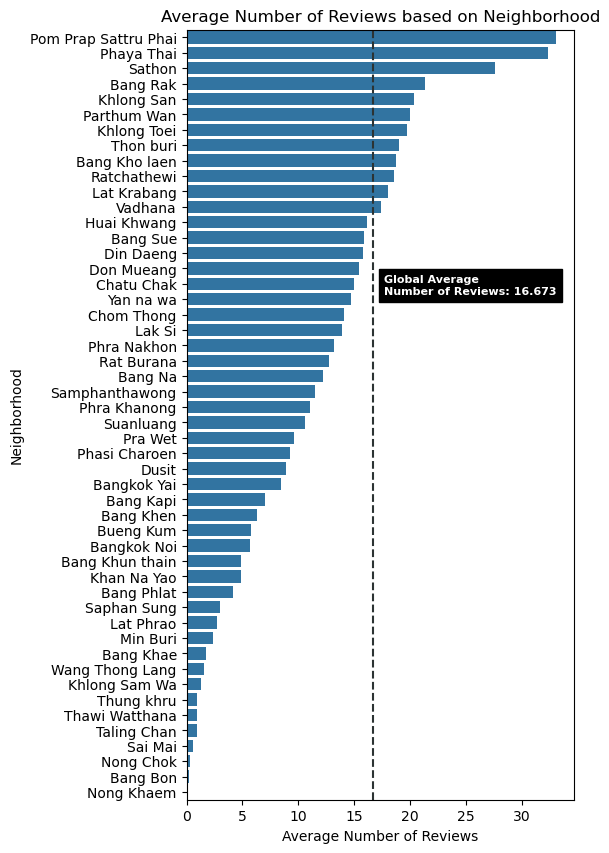

In [25]:
# Group by 'neighbourhood' and calculate the mean of 'number_of_reviews'
df_reviews_by_neighborhood = df.groupby('neighbourhood')[['number_of_reviews']].mean().sort_values('number_of_reviews', ascending=False)

# Calculate the global mean of 'number_of_reviews'
mean_reviews = df['number_of_reviews'].mean()

fig, ax = plt.subplots(figsize=(5, 10))
plt.title('Average Number of Reviews based on Neighborhood')
sns.barplot(data=df_reviews_by_neighborhood, y='neighbourhood', x='number_of_reviews', orient='h')
plt.axvline(mean_reviews, linestyle='--', color='#2C3333')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Neighborhood')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(s=f'Global Average\nNumber of Reviews: {mean_reviews:.3f}',
             x=xmax*0.51,
             y=mean_reviews,
             fontsize=8,
             backgroundcolor='black',
             color='white',
             fontweight='bold')
plt.show()

Some neighborhoods have a significantly higher average number of reviews compared to others, include Vadhana, Ratchathewi, and Khlong Toei. Based on the limited data visible in the cut-off, some of the top neighborhoods with high average reviews but still below the lines, include Phra Khanong, Bang Sue, and Watthana. Conversely, there are also neighborhoods with a lower average number of reviews. Some examples visible in the cut-off include Khan Na Yao, Bang Phlat, and Saphan Sung.

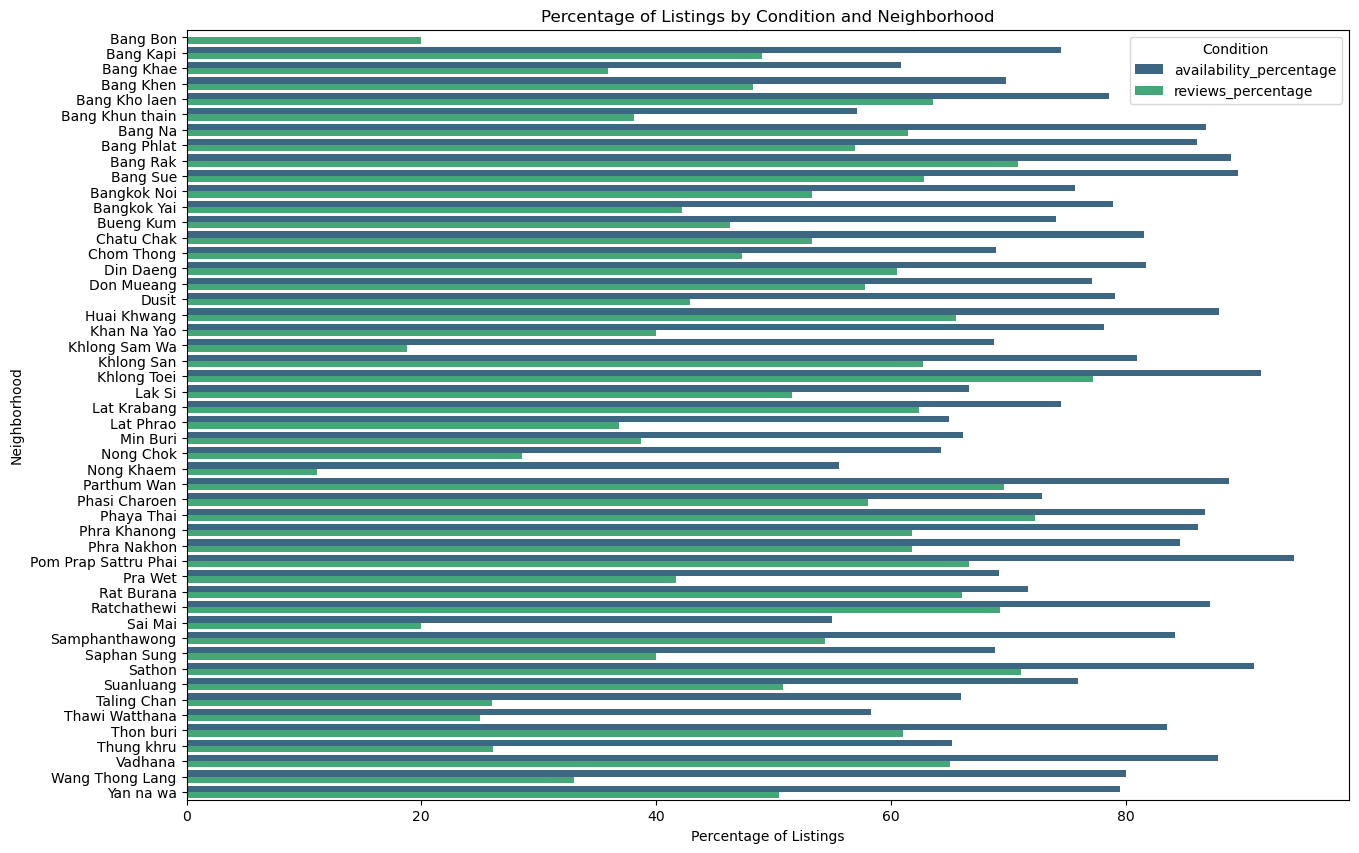

In [26]:
# Calculate total listings per neighborhood
total_counts = df.groupby('neighbourhood').size()

# Calculate counts and percentages for listings with availability_365 < 365
availability_counts = df[df['availability_365'] < 365].groupby('neighbourhood').size()
availability_percentage = (availability_counts / total_counts) * 100

# Calculate counts and percentages for listings with number_of_reviews > 0
reviews_counts = df[df['number_of_reviews'] > 0].groupby('neighbourhood').size()
reviews_percentage = (reviews_counts / total_counts) * 100

# Create a DataFrame with the calculated percentages
percentage_df = pd.DataFrame({
    'neighbourhood': total_counts.index,
    'availability_percentage': availability_percentage,
    'reviews_percentage': reviews_percentage
}).fillna(0).reset_index(drop=True)

# Melt the DataFrame to long format for Seaborn
melted_df = percentage_df.melt(id_vars=['neighbourhood'], 
                               value_vars=['availability_percentage', 'reviews_percentage'], 
                               var_name='Condition', 
                               value_name='Percentage')

# Set the plot size
plt.figure(figsize=(15, 10))

# Create the bar plot
sns.barplot(x='Percentage', y='neighbourhood', hue='Condition', data=melted_df, palette='viridis')

# Add titles and labels
plt.title('Percentage of Listings by Condition and Neighborhood')
plt.xlabel('Percentage of Listings')
plt.ylabel('Neighborhood')

# Show the plot
plt.show()

We take the percentage by total listings that at least have been booked 1 days in year ahead, and listings that have reviews more than 0. There is still a gap lead by availability percentage for each Neighborhood, meaning that we can still optimize number of reviews for 1 year ahead. Our mission is to reduce availability rate, but increase the number of reviews.

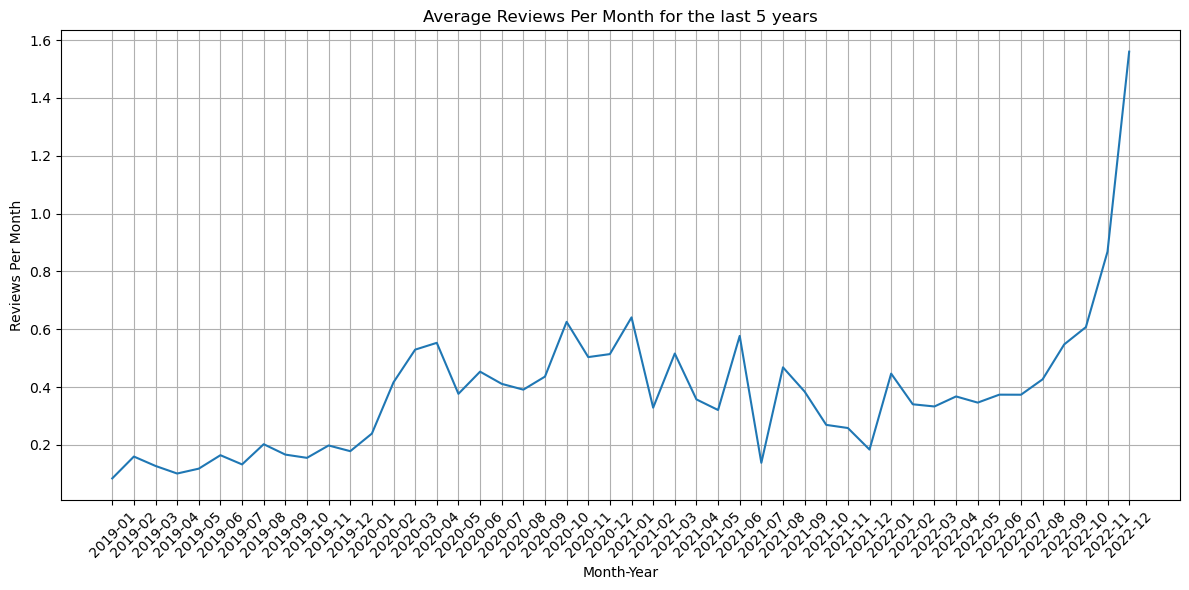

In [27]:
# Create a new 'month_year' column with formatted month and year
df['month_year'] = df['last_review'].dt.strftime('%Y-%m')  # Year-Month format

# Filter data for last 5 years
df_filtered = df[df['last_review'].dt.year >= 2019]  # Use dt.year if available

# Group by month_year and calculate average reviews
average_reviews_per_month = df_filtered.groupby('month_year')['reviews_per_month'].mean()

# Create line graph (single line)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(average_reviews_per_month.index, average_reviews_per_month.values)
plt.xlabel('Month-Year')  # Label adjusted to reflect combined format
plt.ylabel('Reviews Per Month')
plt.title('Average Reviews Per Month for the last 5 years')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

Here are the average review per month for the last 5 years. Based on the graph, reviews per month for every listings in Bangkok, having stagnan between the start of 2020 and the end of 2021. As it follows to skyrocketing in beginning of 2022. This might be cause of the easing of the Covid-19 quarantine regulations. In conclusion, it showing a positive trend for the reviewers.

Is our listings name affecting popularity?

Since there will be high population of foreigners that will came, and there is listings name that non-english, we will analyze whether its affecting popularity. We will classified englih listings name as foreigner-friendly.

In [28]:
import re
import string
import emoji

# Deletes emojis in listings
def remove_emojis(text): 
    return ''.join(c for c in text if (emoji.is_emoji(c) == False))

# Deletes miscellaneous symbols in listings
def remove_misc_symbols(text): 
    emoji_pattern = re.compile(pattern="["
                                     u"\U0001F600-\U0001F64F"  # Emojis in the Miscellaneous Symbols and Faces range
                                     u"\U0001F300-\U0001F5FF"  # Emojis in the Miscellaneous Symbols range
                                     u"\U0001F680-\U0001F6FF"  # Emojis in the Transport and Map Symbols range
                                     u"\U0001F700-\U0001F77F"  # Emojis in the Alchemical Symbols range
                                     u"\u2600-\u26FF"  # Miscellaneous Symbols range
                                     u"\u2700-\u27BF"  # Dingbats and Miscellaneous Symbols range
                                     u"\u25A0-\u25FF" # Geometric Shapes range
                                     u"\u1D10-\u1D1F" # Musical Symbols range
                                     u"\u2460-\u24FF" # Enclosed Alphanumeric range
                                     "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# To check if the listing name only contains English words
def contains_only_english_words(input_string): 
    pattern = r'^[a-zA-Z0-9\s' + re.escape(string.punctuation) + ']+$'
    return re.match(pattern, input_string) is not None

# Creating new column that contains no emojis or miscellaneous symbols
df['name_no_emoji'] = df['name'].apply(remove_emojis)
df['name_no_emoji'] = df['name_no_emoji'].apply(remove_misc_symbols)

# From the new column, determine whether the name contains only alphanumeric and symbol characters.
df['foreigner_friendly'] = df['name_no_emoji'].apply(contains_only_english_words)
df['foreigner_friendly'] = np.where(df['foreigner_friendly'], 'Yes', 'No')
df

id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                   0.00                               2               358   
2                   0.00                               1               365   
3                   0.03                               1               323   
4                   0.00                               3               365   
...                  ...                             ...               ...   
15849               0.00                               1               362   
15850               0.00                              14               365   
15851               0.00                              14               365   
15852               0.00                              14               365   
15853               0.00                              14               365   

       number_of_reviews_ltm month_year  \
0                          0    2020-01   
1                          0        NaN   
2                          0        NaN   
3                          1    2022-04   
4                          0        NaN   
...                      ...        ...   
15849                      0      

Text(0.5, 1.0, 'Percentage of Foreigner-friendly Listings Name')

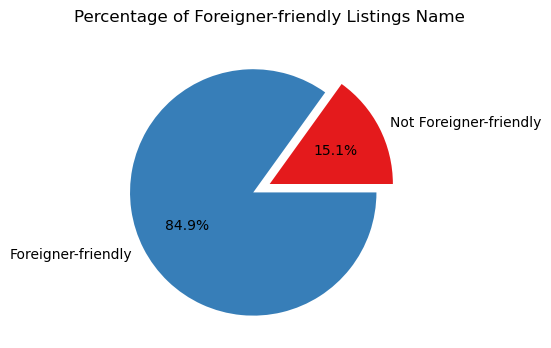

In [29]:
plt.figure(figsize=(10,4))

plt.pie(df.groupby('foreigner_friendly')['name'].count(), 
        labels=['Not Foreigner-friendly','Foreigner-friendly'], 
        autopct='%.1f%%', 
        startangle=0, 
        explode = [0, 0.15],
        colors= sns.color_palette('Set1'))
plt.title('Percentage of Foreigner-friendly Listings Name')

There are 15% listings that using non-english name, now we will check if its affecting the number of reviews.

Text(0.5, 1.0, 'Number of Reviews vs Foreigner-friendly Listings Name')

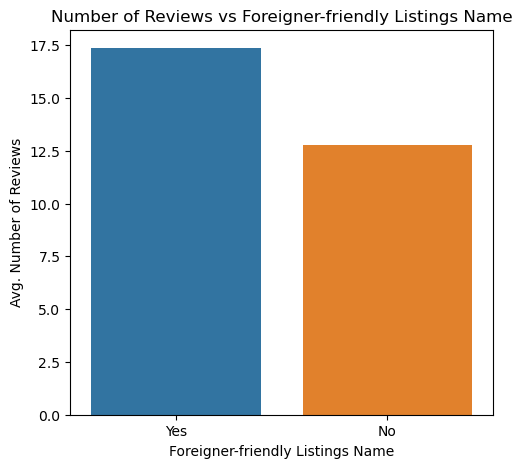

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=df, x='foreigner_friendly', y='number_of_reviews', hue='foreigner_friendly', errorbar=('ci',0))
plt.xlabel('Foreigner-friendly Listings Name')
plt.ylabel('Avg. Number of Reviews')
plt.title('Number of Reviews vs Foreigner-friendly Listings Name')

If we see from the barchart above, foreigner-friendly listings name tend to be have more avg. number of reviews than the other.

2. How Might We increase the foreigners tendencies to book an AirBnB, instead of hotel.

Is our listings location near the possible festival location?

In [31]:
# Count the number of listings per neighborhood
listing_counts = df['neighbourhood'].value_counts().reset_index()
listing_counts.columns = ['neighbourhood', 'count']

# Load the GeoJSON file
geojson_file = 'Bangkok_Neighborhoods.geojson'  # Path to your downloaded GeoJSON file
gdf = gpd.read_file(geojson_file)

# Merge the GeoDataFrame with the average price data
merged_gdf = gdf.merge(listing_counts, left_on='neighbourhood', right_on='neighbourhood')  # Update the key if necessary

# Create a Folium map centered on Bangkok
m = folium.Map(location=[13.7563, 100.5018], zoom_start=10)

# Create a choropleth layer
folium.Choropleth(
    geo_data=merged_gdf,
    data=merged_gdf,
    columns=['neighbourhood', 'count'],  # Update the key if necessary
    key_on='feature.properties.neighbourhood',  # Update the key if necessary
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total listings'
).add_to(m)

# Add layer control to toggle layers
folium.LayerControl().add_to(m)

# Add tooltips
style_function = lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 'color': '#000000', 'fillOpacity': 0.50, 'weight': 0.1}

tooltip = folium.features.GeoJson(
    merged_gdf,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['neighbourhood', 'count'],
        aliases=['Neighborhood: ', 'Total listings: '],
        localize=True
    )
)
m.add_child(tooltip)
m.keep_in_front(tooltip)

# City Centre
centre_lat = 13.738717652945653
centre_long = 100.56136714224954
folium.Circle(
    location=[centre_lat, centre_long],
    radius=5000,
    color='green',
    fill=True,
    fill_opacity=0,
    tooltip= f"5 km radius from Sukhumvit"
).add_to(m)
folium.Marker(location= [centre_lat,centre_long],
                  tooltip= f"Location of Sukhumvit: Bangkok City Centre",
                  icon= folium.Icon(color='green',
                                icon='info-sign')).add_to(m)

# Display the map
m


Sumkhuvit is considered as city centre of Bangkok, it is filled with fine restaurants, bars, dance clubs, bookstores, Internet cafes and shopping centers. Sumkhuvit also shows a tendencies the possibilities to be the host of Tomorrowland. As proven by the count of listings, the more centered the higher the listings number. If we take a 5km radius, there will be some neighborhood that showing great density of listings; Vadhana, Khlong Toei, Huai Khwang, Din Daeng, Phaya Thai, Ratchathewi, Pathum Wan, Bang Rak, Sathon.

Spearman Correlation between price and number of reviews: -0.020513895991616987


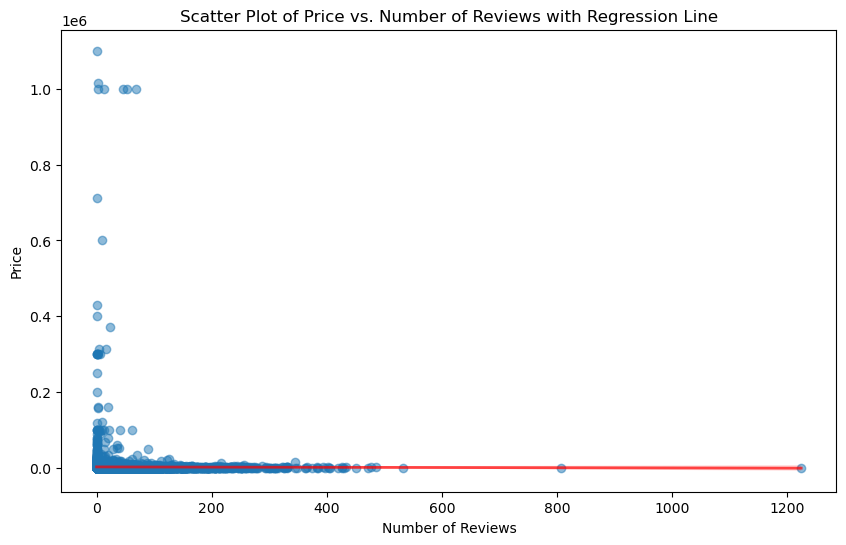

In [32]:
# Calculate Spearman correlation
spearman_corr = df['price'].corr(df['number_of_reviews'], method='spearman')
print(f"Spearman Correlation between price and number of reviews: {spearman_corr}")

# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='number_of_reviews', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Number of Reviews with Regression Line')
plt.show()

If we see from the Spearman correlation between number of reviews and price, there is showing a negative correlation as also shown in Scatter plot, means there is no correlation between number of reviews and price. Thus, we can continue to find the most affordable neighborhood in the radius, to consider which neighborhood to be given campaign.

Entire home/apt

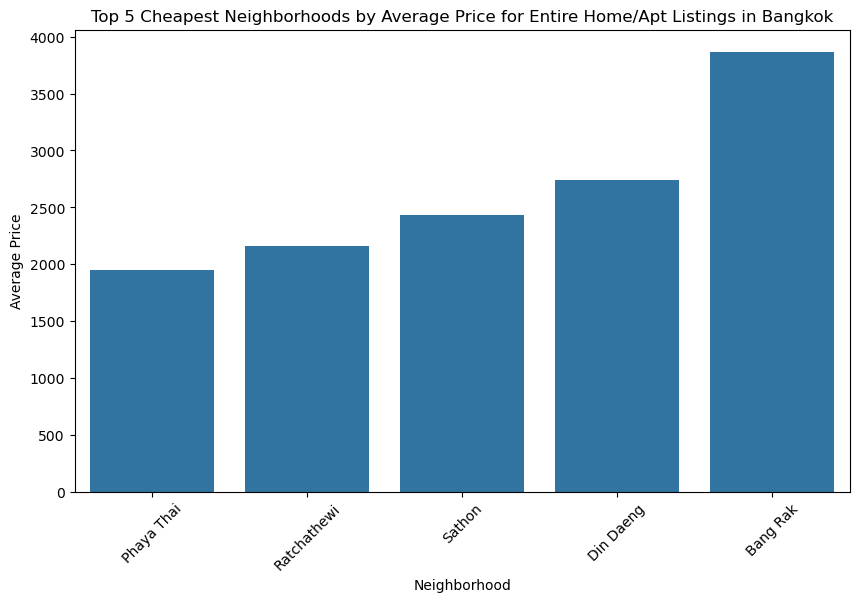

In [33]:
# Filter the dataset to include only 'Entire home/apt' listings
df_entire_home = df[df['room_type'] == 'Entire home/apt']

# Filter to include only the specified neighborhoods
selected_neighborhoods = [
    'Vadhana', 'Khlong Toei', 'Huai Khwang', 'Din Daeng', 'Phaya Thai',
    'Ratchathewi', 'Pathum Wan', 'Bang Rak', 'Sathon'
]
df_filtered_neighborhoods = df_entire_home[df_entire_home['neighbourhood'].isin(selected_neighborhoods)]

# Group by 'neighbourhood' and calculate the mean of 'price'
average_price_per_neighborhood = df_filtered_neighborhoods.groupby('neighbourhood')['price'].mean().reset_index()

# Rename the columns for better readability
average_price_per_neighborhood.columns = ['neighbourhood', 'average_price']

# Sort the data by 'average_price' in ascending order and get the top 5
cheapest_5_neighborhoods = average_price_per_neighborhood.sort_values(by='average_price', ascending=True).head(5)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='average_price', data=cheapest_5_neighborhoods)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 5 Cheapest Neighborhoods by Average Price for Entire Home/Apt Listings in Bangkok')
plt.show()

Hotel room

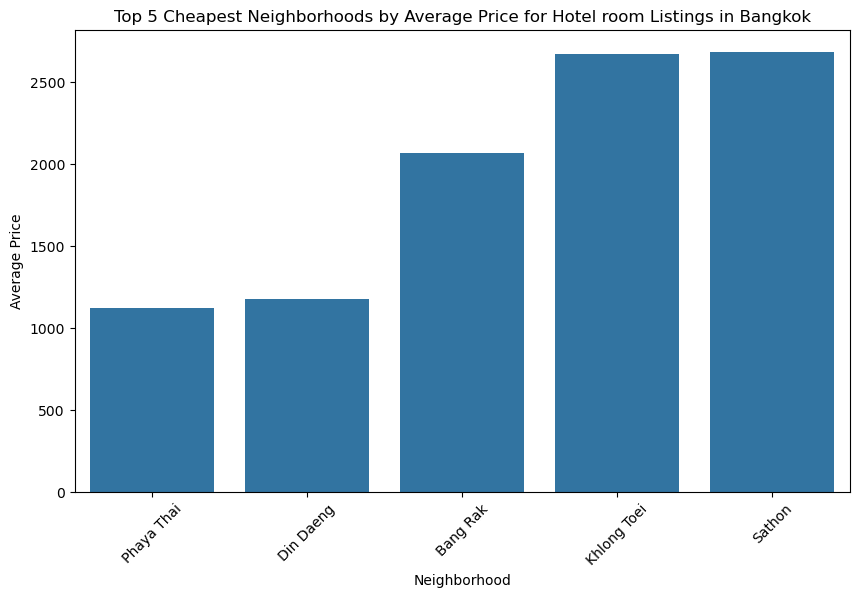

In [34]:
# Filter the dataset to include only 'Hotel room' listings
df_entire_home = df[df['room_type'] == 'Hotel room']

# Filter to include only the specified neighborhoods
selected_neighborhoods = [
    'Vadhana', 'Khlong Toei', 'Huai Khwang', 'Din Daeng', 'Phaya Thai',
    'Ratchathewi', 'Pathum Wan', 'Bang Rak', 'Sathon'
]
df_filtered_neighborhoods = df_entire_home[df_entire_home['neighbourhood'].isin(selected_neighborhoods)]

# Group by 'neighbourhood' and calculate the mean of 'price'
average_price_per_neighborhood = df_filtered_neighborhoods.groupby('neighbourhood')['price'].mean().reset_index()

# Rename the columns for better readability
average_price_per_neighborhood.columns = ['neighbourhood', 'average_price']

# Sort the data by 'average_price' in ascending order and get the top 5
cheapest_5_neighborhoods = average_price_per_neighborhood.sort_values(by='average_price', ascending=True).head(5)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='average_price', data=cheapest_5_neighborhoods)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 5 Cheapest Neighborhoods by Average Price for Hotel room Listings in Bangkok')
plt.show()

Private room

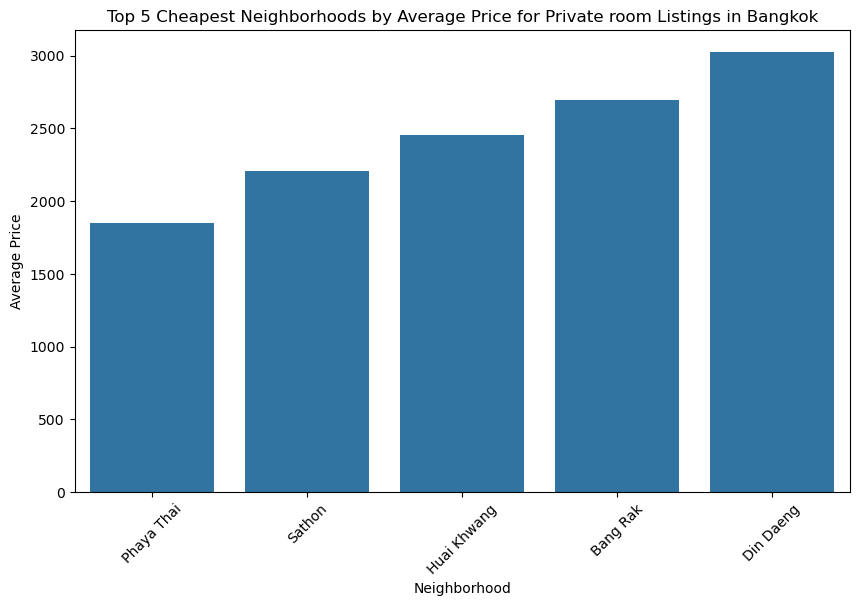

In [35]:
# Filter the dataset to include only 'Private room' listings
df_entire_home = df[df['room_type'] == 'Private room']

# Filter to include only the specified neighborhoods
selected_neighborhoods = [
    'Vadhana', 'Khlong Toei', 'Huai Khwang', 'Din Daeng', 'Phaya Thai',
    'Ratchathewi', 'Pathum Wan', 'Bang Rak', 'Sathon'
]
df_filtered_neighborhoods = df_entire_home[df_entire_home['neighbourhood'].isin(selected_neighborhoods)]

# Group by 'neighbourhood' and calculate the mean of 'price'
average_price_per_neighborhood = df_filtered_neighborhoods.groupby('neighbourhood')['price'].mean().reset_index()

# Rename the columns for better readability
average_price_per_neighborhood.columns = ['neighbourhood', 'average_price']

# Sort the data by 'average_price' in ascending order and get the top 5
cheapest_5_neighborhoods = average_price_per_neighborhood.sort_values(by='average_price', ascending=True).head(5)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='average_price', data=cheapest_5_neighborhoods)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 5 Cheapest Neighborhoods by Average Price for Private room Listings in Bangkok')
plt.show()

Shared room

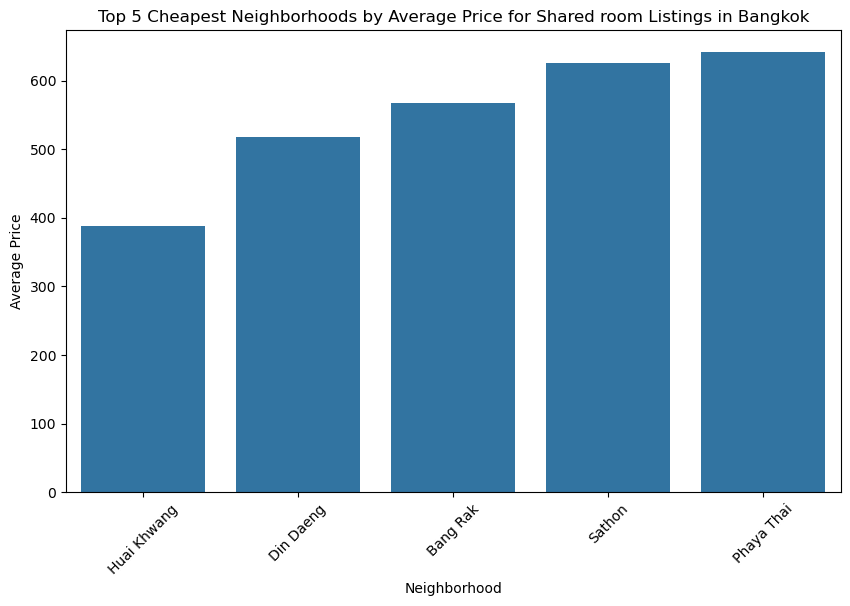

In [36]:
# Filter the dataset to include only 'Shared room' listings
df_entire_home = df[df['room_type'] == 'Shared room']

# Filter to include only the specified neighborhoods
selected_neighborhoods = [
    'Vadhana', 'Khlong Toei', 'Huai Khwang', 'Din Daeng', 'Phaya Thai',
    'Ratchathewi', 'Pathum Wan', 'Bang Rak', 'Sathon'
]
df_filtered_neighborhoods = df_entire_home[df_entire_home['neighbourhood'].isin(selected_neighborhoods)]

# Group by 'neighbourhood' and calculate the mean of 'price'
average_price_per_neighborhood = df_filtered_neighborhoods.groupby('neighbourhood')['price'].mean().reset_index()

# Rename the columns for better readability
average_price_per_neighborhood.columns = ['neighbourhood', 'average_price']

# Sort the data by 'average_price' in ascending order and get the top 5
cheapest_5_neighborhoods = average_price_per_neighborhood.sort_values(by='average_price', ascending=True).head(5)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='average_price', data=cheapest_5_neighborhoods)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 5 Cheapest Neighborhoods by Average Price for Shared room Listings in Bangkok')
plt.show()

As several barplot above, there are 4 neighborhood that mentioned in each room type, which was; Phaya Thai, Din Daeng, Sathon, Bang Rak. We can conclude that it is the most affordable neighborhood near the city centre.

Minimum nights

C:\Users\rifqi\AppData\Local\Temp\ipykernel_22652\1309801370.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='minimum_nights', y='frequency', data=min_nights_count_df, palette='viridis')


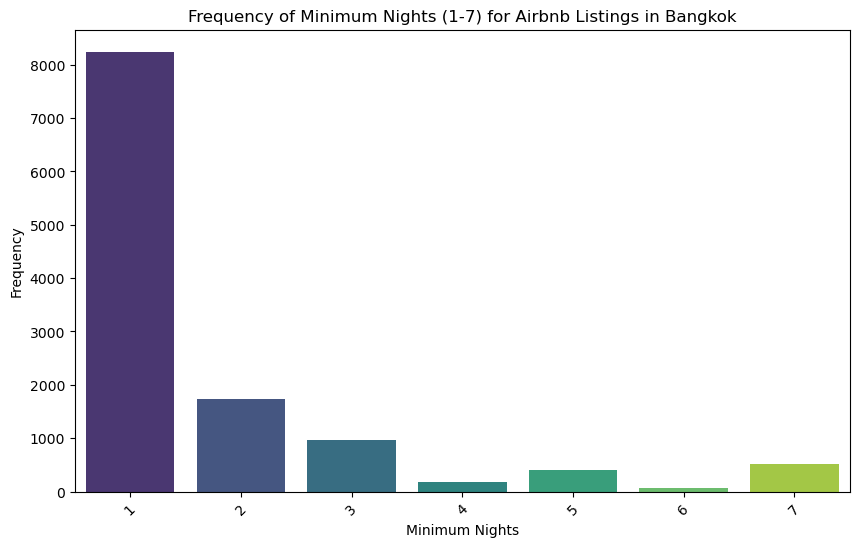

In [37]:
# Filter the dataset for listings with minimum nights between 1 and 7
df_filtered_min_nights = df[df['minimum_nights'].between(1, 7)]

# Create a frequency count of minimum nights
min_nights_count = df_filtered_min_nights['minimum_nights'].value_counts().sort_index()

# Convert to a DataFrame for easier plotting
min_nights_count_df = min_nights_count.reset_index()
min_nights_count_df.columns = ['minimum_nights', 'frequency']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='minimum_nights', y='frequency', data=min_nights_count_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Frequency of Minimum Nights (1-7) for Airbnb Listings in Bangkok')
plt.show()

The Tomorrowland festival will be held from 3-5 days for 3 days pass & 1 day pass ticket holder, it includes the foreigner's arrival and departure, as seen in the chart above there is showing a positive proportion of 1-3 minimum nights, indicates that we can catter the foreigner's that came for the festival. 

# Recommendation

- Encourage the hosts in neighborhood that have less popularity to encourage their guests to leave a review. 
- Encourage the hosts that have non english listings to adjusting their respective listing names to more globally recognized language.
- For all Neighborhood that considered as affordable near the city centre we can optimize the price based by demand but still offering experiences (ex. every guest want to attend the festival grouped in the same shared room, by input their ticket code to airbnb, group packages discount in entire home/apt) 
- Host with minimum night more than 5 can consider to lower their minimum nights, during the festival, it will increase the company revenue and increase their occupancy rate.


<br><br>We will export this clean dataset to csv, to create dashboard in Tableau 
<br><br>Link to Tableau:
<br>https://public.tableau.com/app/profile/rifqi.aria.bramantyo/viz/AirBnBBangkok_17176791815320/AirBnB_Bangkok_Dashboard?publish=yes.

In [38]:
# Export to csv

df.to_csv('Airbnb Listings Bangkok (Clean).csv', index=False)